In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import glob

%matplotlib inline

In [2]:
files = glob.glob('../Data/*.csv')
# cols = pd.read_csv(files[len(files)-1]).columns
# bikes = pd.DataFrame(columns = cols)
# for bike in files:
#     data = pd.read_csv(bike)
#     bikes = bikes.append(data)

In [3]:
# only working with 2016 for now
len(files)
bikes = pd.DataFrame(columns = pd.read_csv(files[21]).columns)
for bike in files[21:26]:
    bikes=bikes.append(pd.read_csv(bike))

In [4]:
bikes.shape

(3333786, 10)

In [5]:
bikes.columns

Index([u'Account type', u'Bike number', u'Duration (ms)', u'End date',
       u'End station', u'End station number', u'Member Type', u'Start date',
       u'Start station', u'Start station number'],
      dtype='object')

In [6]:
bikes.head()

,Account type,Bike number,Duration (ms),End date,End station,End station number,Member Type,Start date,Start station,Start station number
0,NaN,W00022,301295,4/1/2016 0:04,1st & Rhode Island Ave NW,31506,Registered,3/31/2016 23:59,11th & S St NW,31280
1,NaN,W01294,557887,4/1/2016 0:08,18th St & Wyoming Ave NW,31114,Registered,3/31/2016 23:59,New Hampshire Ave & 24th St NW,31275
2,NaN,W01416,555944,4/1/2016 0:08,18th & M St NW,31221,Registered,3/31/2016 23:59,14th & V St NW,31101
3,NaN,W01090,766916,4/1/2016 0:09,17th & Corcoran St NW,31214,Registered,3/31/2016 23:57,34th St & Wisconsin Ave NW,31226
4,NaN,W21934,139656,3/31/2016 23:59,27th & Crystal Dr,31009,Registered,3/31/2016 23:57,23rd & Crystal Dr,31011


In [7]:
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format = True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format = True)

In [8]:
bikes['start_year']=bikes.start.dt.year
bikes['end_year']=bikes.end.dt.year
bikes['start_month']=bikes.start.dt.month
bikes['end_month']=bikes.end.dt.month
bikes['start_day']=bikes.start.dt.day
bikes['end_day']=bikes.end.dt.day
bikes['start_hour'] = bikes.start.dt.hour
bikes['start_minute'] = bikes.start.dt.minute
bikes['end_hour'] = bikes.end.dt.hour
bikes['end_minute']=bikes.end.dt.minute
bikes['start_weekday'] = bikes.start.dt.weekday
bikes['end_weekday'] = bikes.end.dt.weekday
bikes['trip_time']=(bikes['Duration (ms)']/60000).astype(float)

In [9]:
weekdays = {i:day for i,day in enumerate(['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])}

In [10]:
bikes['start_day_name']=bikes.start_weekday.apply(lambda x: weekdays[x])
bikes['end_day_name']=bikes.end_weekday.apply(lambda x: weekdays[x])

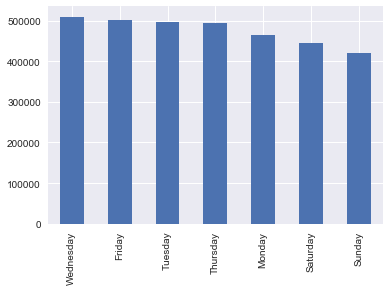

In [11]:
## what's the most common weekday?
bikes.start_day_name.value_counts().plot(kind='bar')

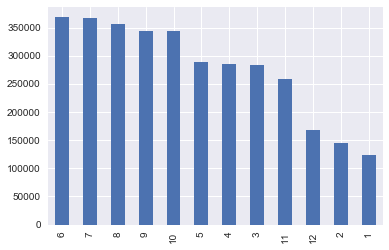

In [12]:
## What's the most common month?
bikes.start_month.value_counts().plot(kind='bar')

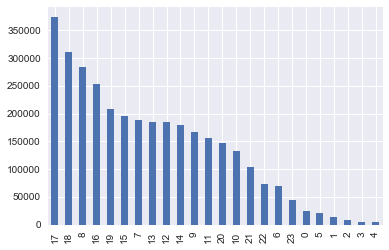

In [13]:
## What's the most common hour?
bikes.start_hour.value_counts().plot(kind='bar')

(array([ 467560.,  956446.,  670996.,  429254.,  278321.,  163640.,
          77628.,   44564.,   31008.,   25521.,   21331.,   18270.,
          15001.,   12469.,   11271.,   10294.,    9606.,    8538.,
           7629.,    6785.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100]),
 <a list of 20 Patch objects>)

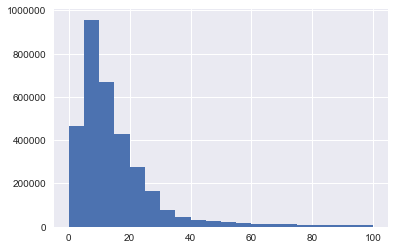

In [14]:
# Most of the trips are pretty short
bins = [x for x in range(0,101,5)]
plt.hist(bikes.trip_time, bins = bins)

In [15]:
print bikes['Account type'].isnull().sum()
print bikes['Member Type'].isnull().sum()
bikes['Type']=bikes['Member Type'].fillna(bikes['Account type'])
bikes.Type.value_counts()

2391454
942332


Registered    2601521
Casual         732265
Name: Type, dtype: int64

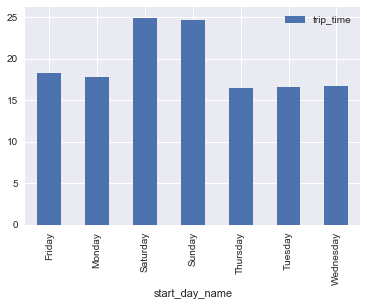

In [16]:
bikes.groupby('start_day_name')['Type','trip_time'].mean().plot(kind='bar')

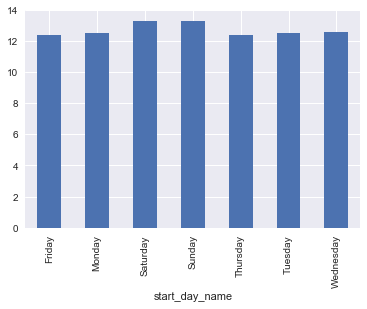

In [17]:
bikes[bikes.Type=='Registered'].groupby('start_day_name').trip_time.mean().plot(kind='bar')

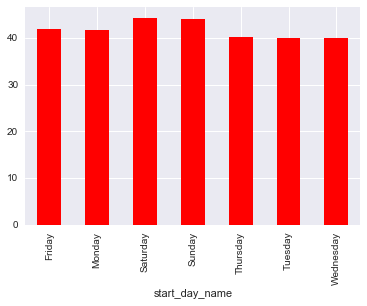

In [18]:
bikes[bikes.Type=='Casual'].groupby('start_day_name').trip_time.mean().plot(kind='bar', color='r')

In [19]:
print bikes.groupby('Type').trip_time.mean()
print bikes.groupby('Type').trip_time.count()

Type
Casual        42.303157
Registered    12.660977
Name: trip_time, dtype: float64
Type
Casual         732265
Registered    2601521
Name: trip_time, dtype: int64


In [20]:
dums=pd.get_dummies(bikes['End station number'])
all_bikes= pd.concat([bikes, dums], axis=1)

In [22]:
all_bikes.iloc[:5,28:]

,31000,31001,31002,31003,31004,31005,31006,31007,31008,31009,...,32211,32212,32213,32214,32215,32216,32218,32219,32221,32222
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
racks = all_bikes['Start station number'].unique()
#bikes.iloc[:5,[22,26:]]

In [ ]:
# making a dataframe of eac

## This section below is for getting station data and other system data

In [ ]:
url = 'https://gbfs.capitalbikeshare.com/gbfs/en/station_information.json'
r = requests.get(url)

In [ ]:
r.json().keys()

In [ ]:
results = r.json()['data']

In [ ]:
results['stations']